In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import topRanking
import analysis
import imageLibs
#import blackCow
import numpy as np

# Error In Top N neighbour
For each image, we look at the neighbour and count number of wrong match
![title](errorInTopN.png)

In [3]:
#bmap=blackCow.loadBlackCowDict()
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top100_top100InTraining.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_1000_epoch120.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000_epoch200.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000_epoch300.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222_batch10_epoch40.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('testDir_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl') # 12 grid
eitDict=analysis.loadPkl('faceBlocked_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('legBlocked_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('faceNLegBlocked_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222_bodyDown_epoch100.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200409-20200731_top1000_model_top1000.222_epoch50.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.112_epoch200_excludeBWP.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222_epoch40_excludeBWP.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222.faceUp_epoch40_excludeBWP.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.222.bodyDown_epoch40_excludeBWP.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.112to222.linear_epoch80.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top1000.112to222.nearest_epoch56.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_uniq_top1000.112_epoch200.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_uniq_top1000.222_epoch40.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_uniq_top1000.222.faceUp_epoch40.fv.best100DistancePerImg.pkl')
# eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_uniq_top1000.222.bodyDown_epoch40.fv.best100DistancePerImg.pkl')

numTop=5
excluded,errorTop=topRanking.errorTopN(eitDict,numTop,excludeList=analysis.excludeImage)
status=[]
for index, row in errorTop.iterrows():
    eid=analysis.getEid(row['imgPath'])
    #status.append(blackCow.isBlackCow(bmap,eid))

#errorTop['isBlack']=status
    

95 cows have less than 5 images. They are excluded.


In [4]:
haveError=errorTop.loc[errorTop['errorCount']>0]
numError=len(haveError['errorCount'])
numImg=len(errorTop) - len(excluded)
percentError=numError/numImg*100
print(f"{percentError:5.2f}% ({numError}/{numImg}) images have an error in the top 5 closest images (erroInTop5)")

#numBlackImg=len(haveError[haveError.isBlack==True])
#print("{:5.2f}% ({}/{}) problematic images is from black cow".format(numBlackImg/numError*100,numBlackImg,numError))


aaaaaaa                                                 imgPath  errorCount  \
0     cowId.faceBennett.20200801-20200821_uniq/98212...           5   
1     cowId.faceBennett.20200801-20200821_uniq/98212...           5   
2     cowId.faceBennett.20200801-20200821_uniq/98212...           5   
3     cowId.faceBennett.20200801-20200821_uniq/98212...           5   
4     cowId.faceBennett.20200801-20200821_uniq/98212...           5   
...                                                 ...         ...   
1792  cowId.faceBennett.20200801-20200821_uniq/98212...           1   
1793  cowId.faceBennett.20200801-20200821_uniq/98212...           1   
1794  cowId.faceBennett.20200801-20200821_uniq/98212...           1   
1795  cowId.faceBennett.20200801-20200821_uniq/98212...           1   
1796  cowId.faceBennett.20200801-20200821_uniq/98212...           1   

      numWrongCow  maxOccurence  
0               1             5  
1               2             3  
2               3             2  
3  

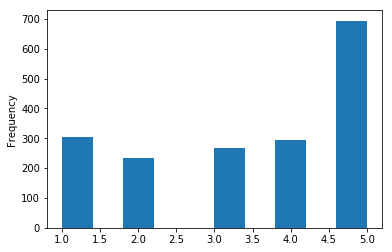

In [5]:

haveError=errorTop.loc[errorTop['errorCount']>0]
haveError['errorCount'].plot.hist()

### Image with all top 5 wrong eid

Per line: first image: ref image. 5 following image are the closest image to the ref image (they are all the wrong cow because we are looking at cow that have 5 errors)


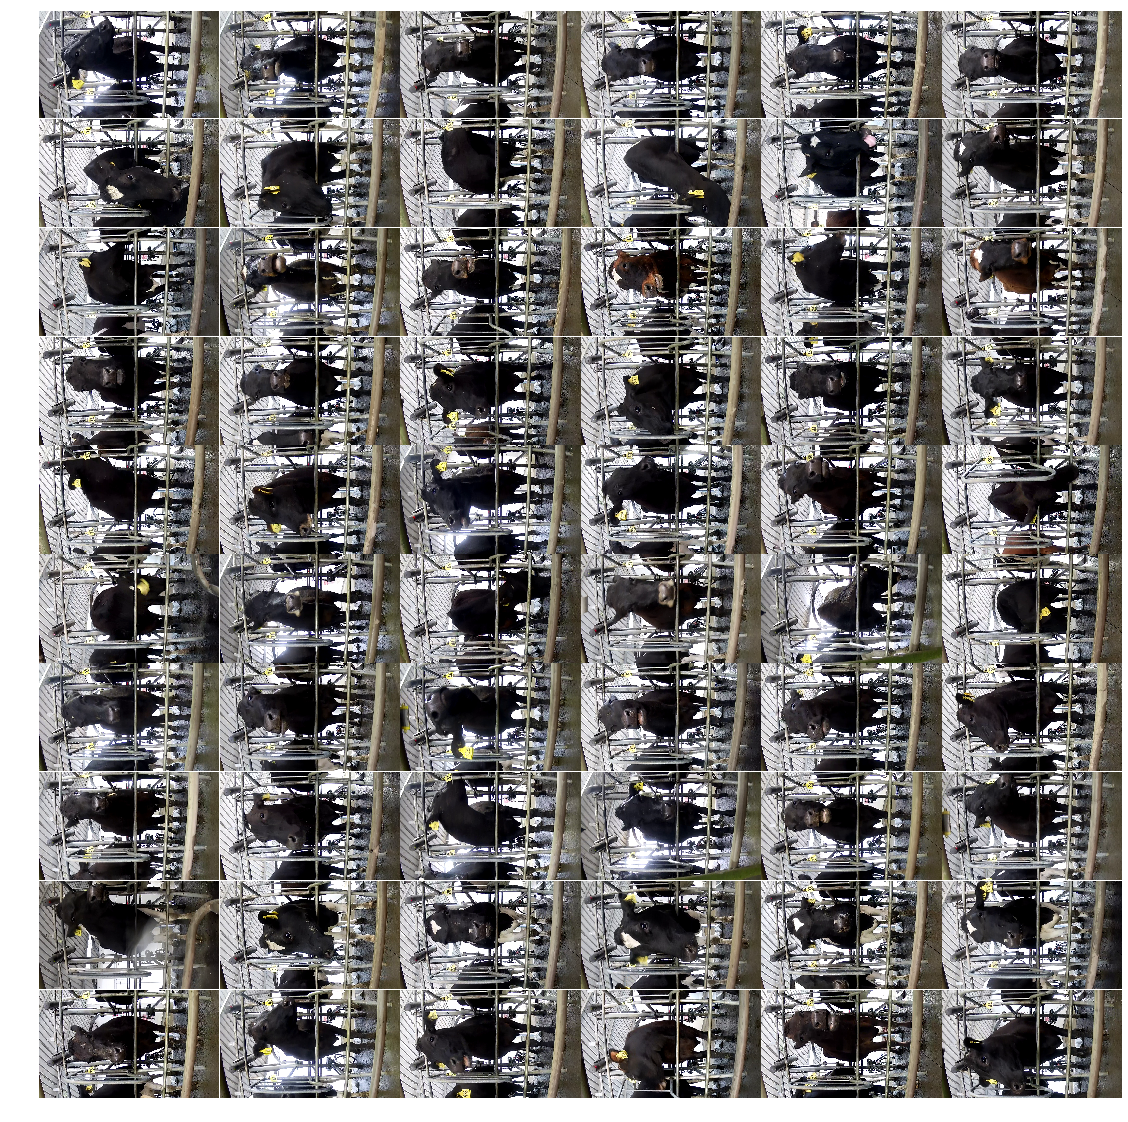

In [6]:
print("Per line: first image: ref image. 5 following image are the closest image to the ref image (they are all the wrong cow because we are looking at cow that have 5 errors)")
analysis.show(topRanking.plotSomeError(errorTop,10,eitDict,5),'')

# Matching-cluster Index
For each image, we calculate the distance to every cluster. We then order the cluster based on their distance to the image. The index is the index of the cluster which the cow belong to. Expecting index = 0. Index 5 means that there are 5 other cows that are closer to the image than the right cluster which the cow belong to.
![title](matchingClusterIndex.png)


In [7]:
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top100_top100InTraining.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_1000_epoch120.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000_epoch200.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000_epoch300.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222_batch10_epoch40.fv.ranking.pkl")
mciDf=analysis.loadPkl("testDir_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("faceBlocked_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("legBlocked_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("faceNLegBlocked_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222_bodyDown_epoch100.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200409-20200731_top1000_model_top1000.222_epoch50.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.112_epoch200_excludeBWP.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222_epoch40_excludeBWP.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222.faceUp_epoch40_excludeBWP.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.222.bodyDown_epoch40_excludeBWP.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.112to222.linear_epoch80.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top1000.112to222.nearest_epoch56.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_uniq_top1000.112_epoch200.fv.ranking.pkl")
# mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_uniq_top1000.222_epoch40.fv.ranking.pkl")
# mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_uniq_top1000.222.faceUp_epoch40.fv.ranking.pkl")
# mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_uniq_top1000.222.bodyDown_epoch40.fv.ranking.pkl")

status=[]
for index, row in mciDf.iterrows():
    eid=analysis.getEid(row['path'])
    #status.append(blackCow.isBlackCow(bmap,eid))
#mciDf['isBlack']=status
badDf=mciDf[mciDf['rank']>0]
goodDf=mciDf[mciDf['rank']==0]
numImg=len(mciDf)
nBad=len(badDf)

In [8]:
print("{:5.2f}% ({}/{}) have matching-cluster index > 0".format(nBad/numImg*100,nBad,numImg))

 5.66% (732/12922) have matching-cluster index > 0


## 50 images that have the Worst Matching-Cluster Index

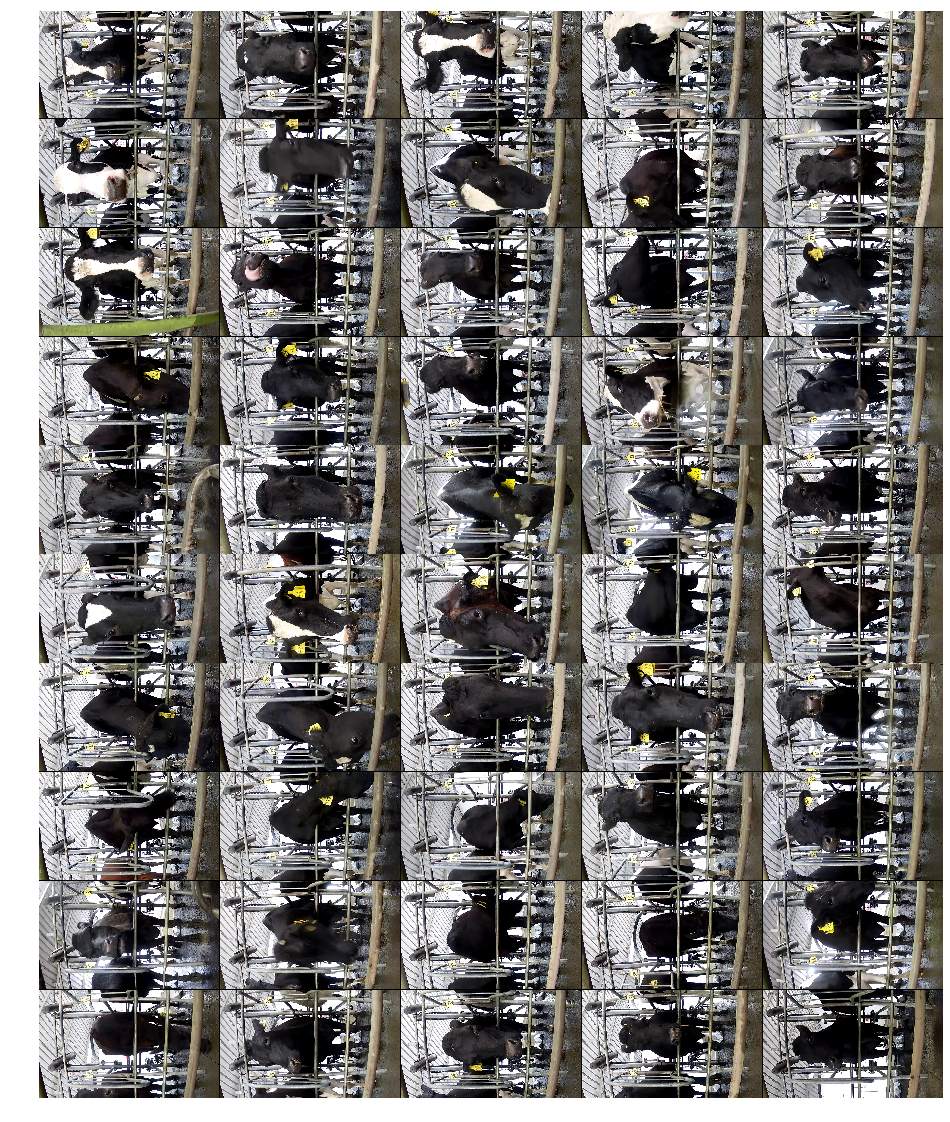

path  rank
0    cowId.faceBennett.20200801-20200821_uniq/98209...   920
1    cowId.faceBennett.20200801-20200821_uniq/98212...   598
2    cowId.faceBennett.20200801-20200821_uniq/98212...   498
3    cowId.faceBennett.20200801-20200821_uniq/98212...   411
4    cowId.faceBennett.20200801-20200821_uniq/98212...   345
..                                                 ...   ...
125  cowId.faceBennett.20200801-20200821_uniq/98212...     9
126  cowId.faceBennett.20200801-20200821_uniq/98212...     9
127  cowId.faceBennett.20200801-20200821_uniq/98212...     9
128  cowId.faceBennett.20200801-20200821_uniq/98212...     9
129  cowId.faceBennett.20200801-20200821_uniq/98212...     9

[130 rows x 2 columns]

In [9]:
#badDf=dfRanking[dfRanking['rank']>0]
badDf=analysis.dfSort(badDf,'rank',ascending=False)
img=imageLibs.mosaic(badDf[:50]['path'],numCol=5,margin=5,cropx0y0x1y1=analysis.cropCoords)
analysis.show(img,'')
badDf[:130]

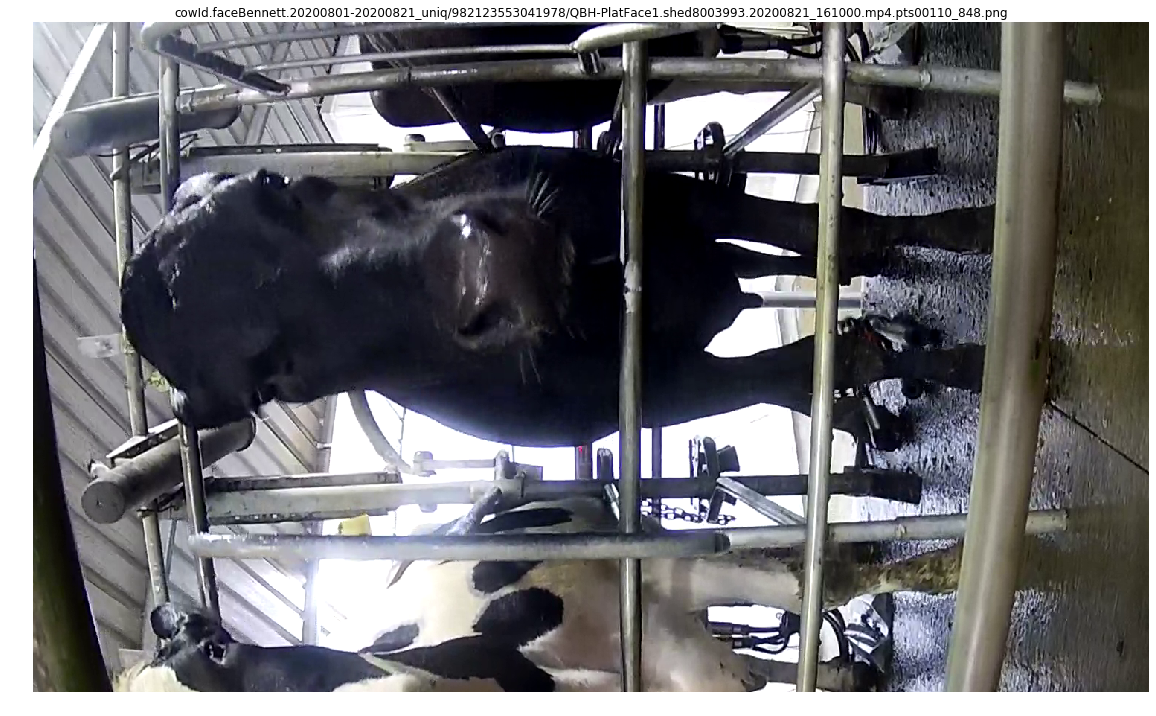

cowId.faceBennett.20200801-20200821_uniq/982123553041978/QBH-PlatFace1.shed8003993.20200821_161000.mp4.pts00110_848.png


In [10]:
id=126
imgPath=badDf[:130]['path'].tolist()[id]
_=imageLibs.showImg(imgPath,title=imgPath,cropx0y0x1y1="150,10,1650,910")
print(imgPath)